In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform, euclidean
from fastdtw import fastdtw
from itertools import combinations_with_replacement, product
import time

In [33]:
n_t = 20
n_n = 10

In [34]:
delta_t = 1
n_t= int(n_t * delta_t)

n_n = int((n_n/2)+1)

print(f"n_t = {n_t}")
print(f"n_n = {n_n}")

n_t = 20
n_n = 6


In [35]:
pi = 3.141596

In [36]:
x = [i for i in np.arange(0,n_t,delta_t)]

In [37]:
def sin_func(x,l,a):
    y = [a*np.sin(2*pi*val/l) for val in x]
    return y

In [38]:
def lin_func(x,m,c):
    y = [m*val + c for val in x]
    return y

In [39]:
sin_dat = np.array([sin_func(x,l,100.) for l in np.arange(0.25*n_t*1,0.25*n_t*n_n,0.25*n_t*1)])
lin_dat = np.array([lin_func(x,m,0.) for m in np.arange(1,n_n,1)])

In [40]:
print(np.shape(sin_dat))
print(np.shape(lin_dat))
M = np.concatenate((sin_dat,lin_dat),axis=0)
print(np.shape(M))

(5, 20)
(5, 20)
(10, 20)


In [41]:
# for jj in range(np.shape(M)[0]):
#     plt.plot(x,M[jj,:])

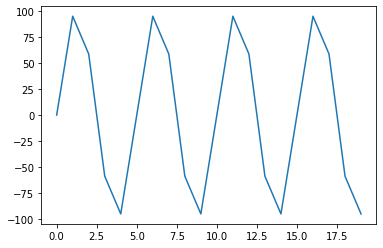

In [42]:
plt.plot(x,M[0,:])

In [43]:
def DTW(M):
    """
    Produce a condensed distance matrix for matrix M using euclidean metric for fastDTW
    https://pypi.org/project/fastdtw/
    \citep{Stan Salvador, and Philip Chan. “FastDTW: Toward accurate dynamic time warping in linear time and space.” Intelligent Data Analysis 11.5 (2007): 561-580.}
    Uses packages:
        import numpy as np
        from scipy.spatial.distance import squareform, euclidean
        from fastdtw import fastdtw
        from itertools import combinations_with_replacement
    Input:
        numpy Matrix shape (n , t) where n is the nth time series of a variable Q, over time series t
    Output:
        numpy Matrix shape (t**2, 2)
    """

    elements = range(np.shape(M)[0])

    iterator = combinations_with_replacement(elements,r=2)
    D = np.zeros((np.shape(M)[0],np.shape(M)[0]))

    for pair in iterator:

            ii = pair[0]
            jj = pair[1]

            x = M[ii]
            y = M[jj]

            distance, path = fastdtw(x,y,dist=euclidean)

            D[ii,jj] = distance
            D[jj,ii] = distance

    D_compressed = squareform(D)

    return D_compressed
    

In [44]:
start = time.time()
D = DTW(M)
end = time.time()
elapsed = end - start
print(f"Elapsed time in DTW = {elapsed}s")

Elapsed time in DTW = 0.8150739669799805s


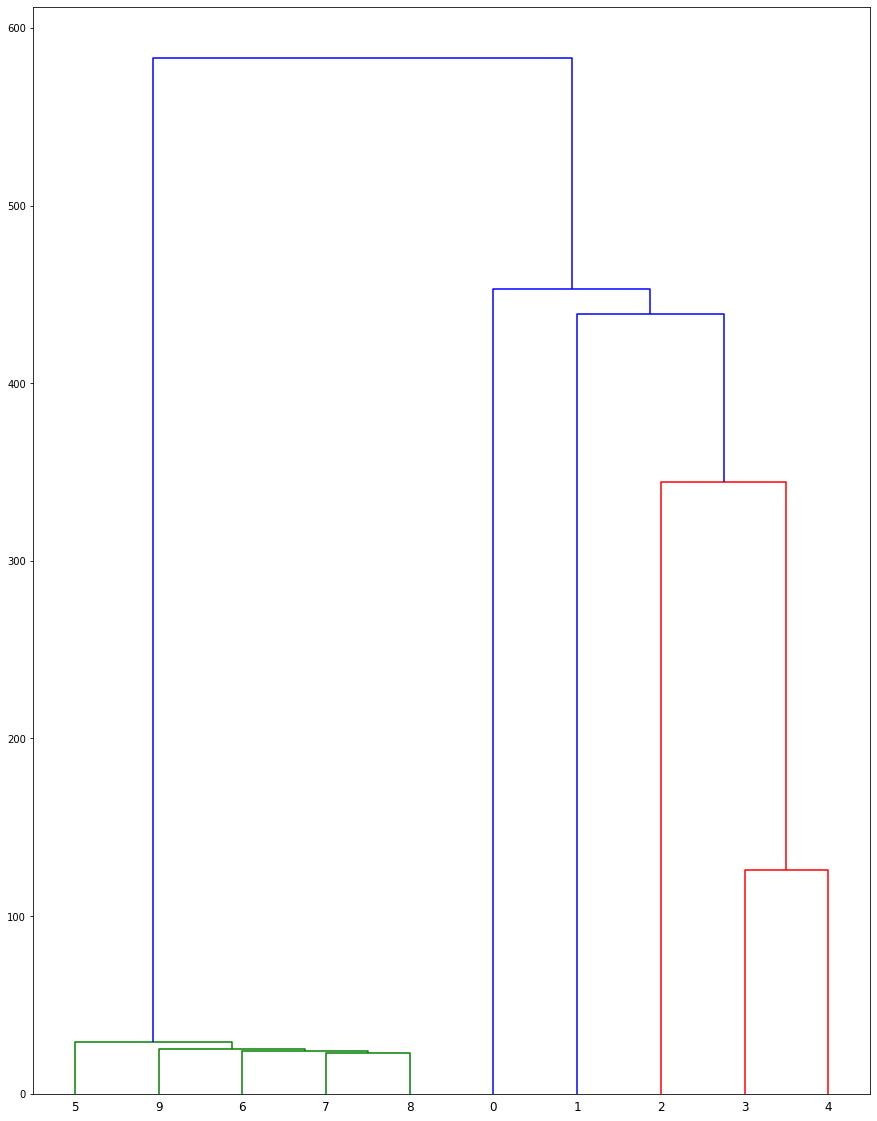

In [15]:
Z = linkage(D,method='single')
fig = plt.figure(figsize=(15,20))
dn = dendrogram(Z)

In [16]:
max_d = 500
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
# class_num = 1
# select = M[np.where(clusters==class_num)]
# for jj in range(np.shape(select)[0]):
#     plt.plot(x,select[jj,:])

In [18]:
# class_num = 2
# select = M[np.where(clusters==class_num)]
# for jj in range(np.shape(select)[0]):
#     plt.plot(x,select[jj,:])